In [ ]:
!pip install --upgrade pandas
!pip install web.py
!pip install pandas-datareader
!pip install yfinance
!pip install fix_yahoo_finance

In [ ]:
import pandas_datareader.data as web
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as date
import web as dt
import datetime as dt

In [ ]:
BBCA = web.DataReader('BBCA', 'yahoo', start='2014-01-01', end='2021-01-01')
BBCA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-09,49.419998,49.419998,49.419998,49.419998,0.0,45.657333
2018-08-10,49.459999,49.459999,49.459999,49.459999,100.0,45.694294
2018-08-13,49.259998,48.959999,49.160000,49.080002,3060150.0,45.343224
2018-08-14,49.740002,49.360001,49.360001,49.740002,9491250.0,45.952972
2018-08-15,49.060001,48.480000,48.799999,48.619999,6709650.0,44.918251
...,...,...,...,...,...,...
2020-12-24,54.119999,53.740002,53.740002,54.119999,97650.0,53.344208
2020-12-28,54.680000,53.619999,54.419998,53.740002,115350.0,52.969650
2020-12-29,54.160000,53.660000,54.060001,53.820000,74800.0,53.048504


In [ ]:
BBCA = BBCA[['Adj Close']].rename(columns={'Adj Close':'Price'}).copy()
BBCA.tail(10)

,Price
Date,
2020-12-17,53.669285
2020-12-18,53.082733
2020-12-21,52.691700
2020-12-22,52.713383
2020-12-23,52.930229
2020-12-24,53.344208
2020-12-28,52.969650
2020-12-29,53.048504
2020-12-30,53.245644


#Visualisasi Data dengan Matplotlib

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

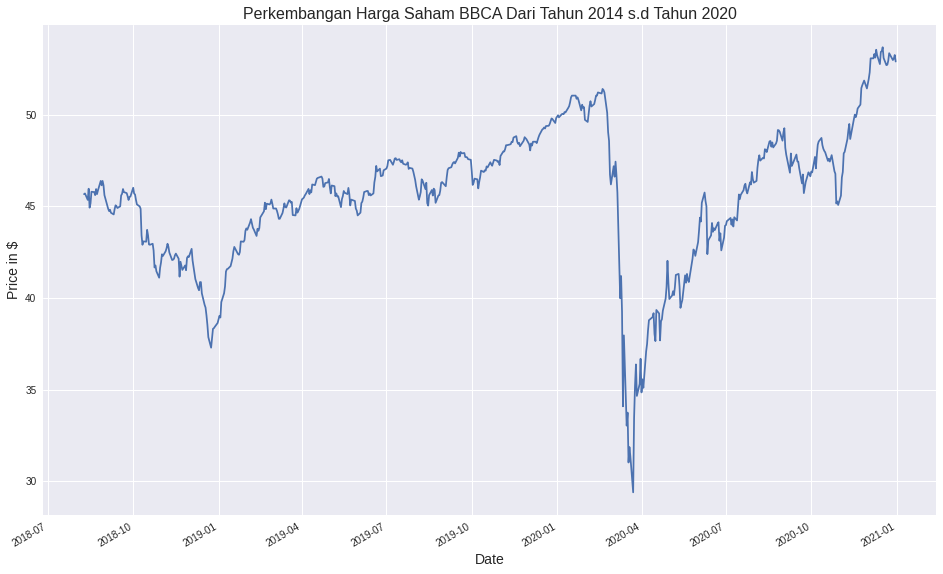

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(BBCA['Price'], '-')
plt.gcf().autofmt_xdate()
plt.title('Perkembangan Harga Saham BBCA Dari Tahun 2014 s.d Tahun 2020', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in $', fontsize=14)
plt.show()

In [ ]:
import numpy as np
Price_2014 = BBCA['Price'][0]
Price_2021 = BBCA['Price'][-1]
roi = np.log(Price_2014 / Price_2021)*100 #Logarithmic Return (Tingkat Pengembalian)
print(f'Price on {BBCA.index[0].strftime("%d-%m-%Y")} : ${round(Price_2014, 2)}')
print(f'Price on {BBCA.index[-1].strftime("%d-%m-%Y")} : ${round(Price_2021, 2)}')
print(f'Return of Investment: {round(roi, 2)}%')

Price on 09-08-2018 : $45.66
Price on 31-12-2020 : $52.89
Return of Investment: -14.71%


Data Analysis

In [ ]:
BBCA['Price d+1'] = BBCA['Price'].shift(-1)
BBCA['ROI'] = np.log(BBCA['Price d+1'] / BBCA['Price']) * 100
BBCA

,Price,Price d+1,ROI
Date,,,
2018-08-09,45.657333,45.694294,0.080919
2018-08-10,45.694294,45.343224,-0.771269
2018-08-13,45.343224,45.952972,1.335779
2018-08-14,45.952972,44.918251,-2.277434
2018-08-15,44.918251,45.158451,0.533325
...,...,...,...
2020-12-24,53.344208,52.969650,-0.704629
2020-12-28,52.969650,53.048504,0.148755
2020-12-29,53.048504,53.245644,0.370933
